<a href="https://colab.research.google.com/github/kimsh519/ms-ai-school/blob/main/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import keras
keras.__version__
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [21]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


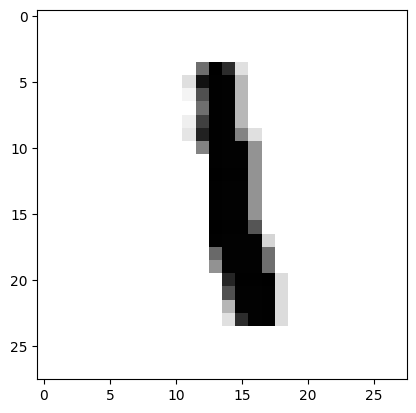

In [22]:
# 데이터 확인
import matplotlib.pyplot as plt

digit = train_images[6]   #7번째 이미지를 가지고 오겠다
plt.imshow(digit , cmap = plt.cm.binary)


In [23]:
# 신경망을 만드는 부분

from keras import models
from keras import layers

network = models.Sequential()    #순차적으로 레이어를 쌓겠다
network.add(layers.Dense(512,activation = 'relu',input_shape= (28*28,)))   # 첫 번째 레이어의 유닛을 512개 생성한 후 relu 방식으로 activation을 넘긴다 
network.add(layers.Dense(10,activation = 'softmax'))
network.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
 # loss function 과 가중치를 조절하는 optimizer 을 설정하고 오류를 잡을 때 어떤 항목을 지표로 할지 정하는 metric이 필요하다


In [24]:
# 데이터를 준비하는 부분

train_images = train_images.reshape((60000,28*28))    
#28*28*60000을 784*60000의 2차원 데이터로 표현 , 컴퓨터의 입장에서 3차원 보다 2차원의 데이터가 계산하기 더 편하다
train_images = train_images.astype('float32') / 255
# type을 float32로 바꾸고, 값을 0~1 사이로 해주기 위하여 255를 나눈다
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [25]:
train_labels # 컴퓨터는 이 숫자가 계산을 위한 숫자인지 구별을 위한 숫자인지 잘 모른다

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
from tensorflow.keras.utils import to_categorical   # 숫자가 구별을 위한 용도라는 것을 표현

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [27]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128) #5번 진행한다

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2649 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1075 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0714 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0518 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0387 - accuracy: 0.9887


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc :',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9783
test acc : 0.9782999753952026
